In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from matplotlib import pylab
import models
from mpl_toolkits.mplot3d import Axes3D
import pyshtools as sht
Sph_harm_op=models.sph_harm_operator.sph_harm_operator

# Parameters

In [2]:
#expansion degreees
degree=35
#generate the complex sphere, value is 1/4pi
clm=sht.SHCoeffs.from_zeros(degree,kind='complex')
clm.set_coeffs(1/4/np.pi,0,0)
grid=clm.expand(grid='DH2')
#initial the operator object
c=Sph_harm_op(degree)

# Prove that:
Known that:  
- The surface gradient $\nabla_s(\psi)=(\mathbf{I}-\mathbf{uu})\cdot\mathbf{\nabla}(\psi)$ ,here $\mathbf{u}$ is the position operator  
- The gradient operator $\nabla(\psi)=-i\mathbf{u}×\mathbf{L}$, here $\mathbf{L}$ is the angular momentum operator.  

Prove that:  
  
- When the position operation $\mathbf{r}$ is the normal vector, ie. the unit sphere, the operation $\mathbf{\nabla}(\psi)$ is vertical to the position operation $\mathbf{r}(\psi)$, and the surface gradient operation $\nabla_s(\psi)$ is equal to gradient operation $\nabla(\psi)$ . 
  
  
i.e.:  
The divergence operator $((\mathbf{I-uu}).\mathbf{∇})・= (\mathbf{∇}・)=(-i\mathbf{u}×\mathbf{L}・)$  in the surface of the unit sphere;

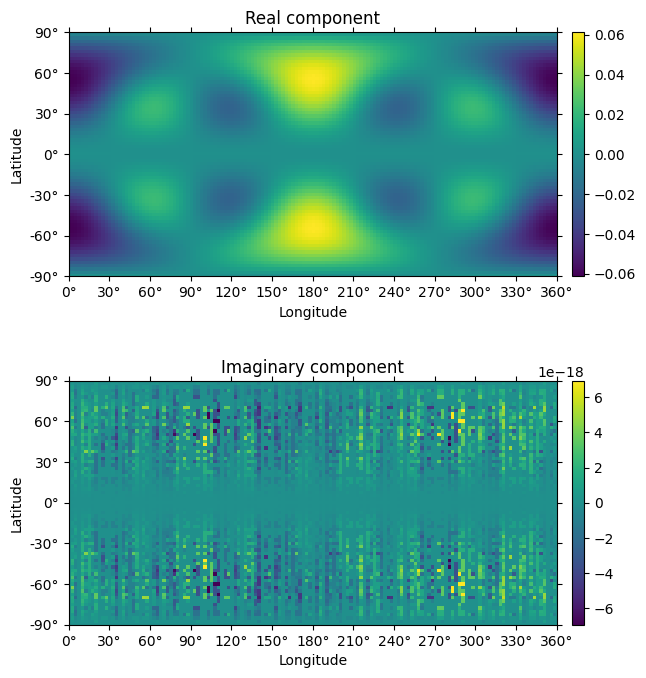

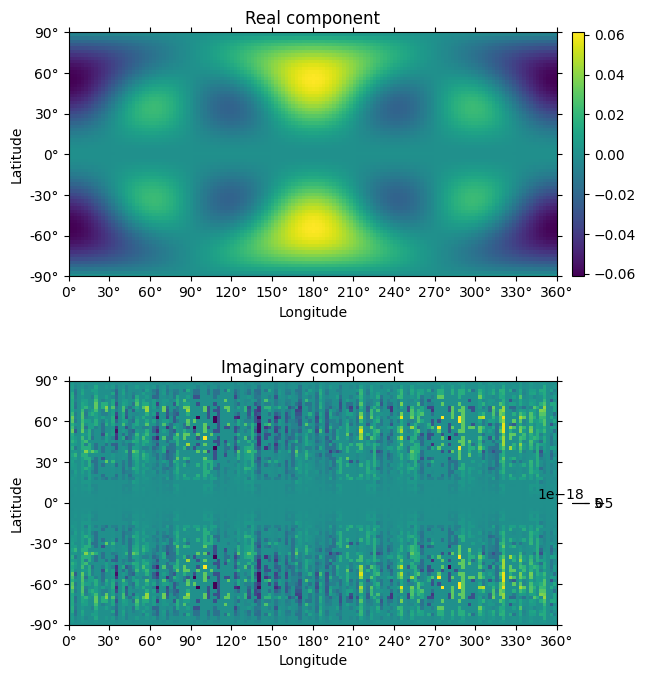

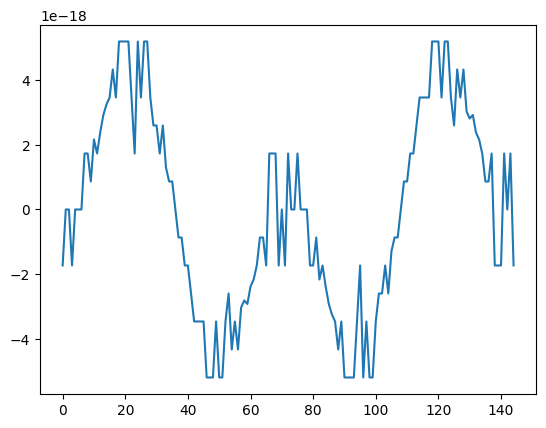

In [3]:
# generator a function on the surface
f=2*c.z(c.z(c.y(c.x(c.to_clm_co(clm)))))
#the ∇_s(ψ)=((I-uu).∇)ψ kind of expression
surf_grad=c.to_clm(c.I_uu_dot([c.deltax(f),c.deltay(f),c.deltaz(f)])[1]).expand()
surf_grad.plot(colorbar='right')

#the ∇_s(ψ)=((I-uu).∇)ψ=∇ψ type when the position operation u is the normal vector, ie. the unit sphere. 
grad=c.to_clm(c.deltay(f)).expand()
grad.plot(colorbar='right')

# plot the difference between the two kind
grad_diff=np.real(surf_grad.data-grad.data)
pylab.imshow(grad_diff)
pylab.figure()
pylab.plot(grad_diff[30,:],)

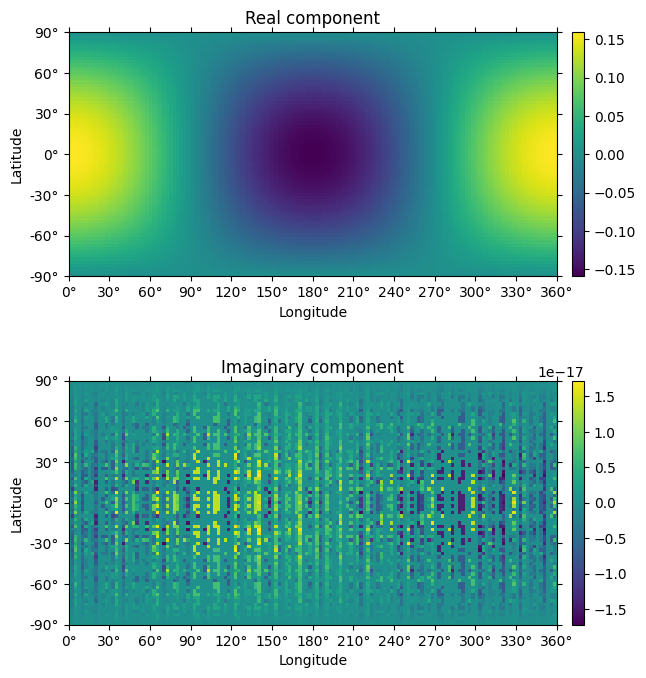

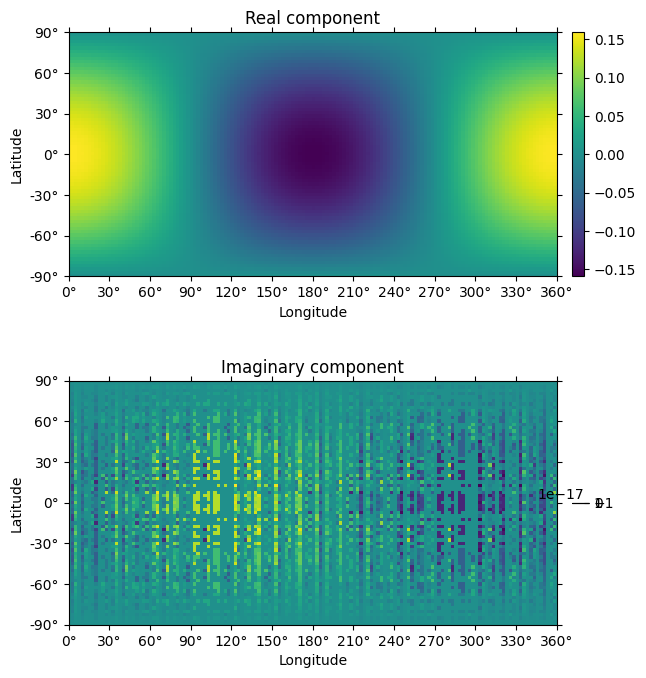

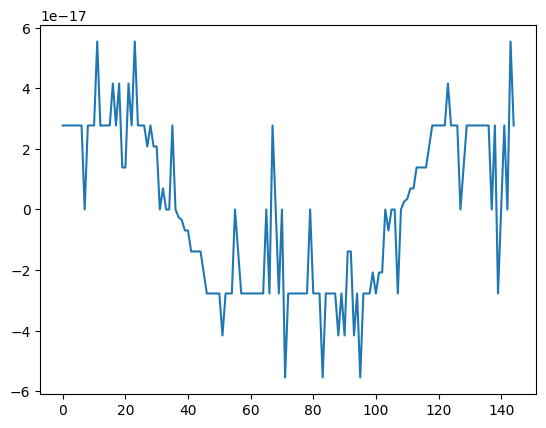

In [4]:
# generator a function on the surface
f=c.x(c.to_clm_co(clm))

#divergence operator of ((I-uu).∇)・ kind of type
surf_div=c.to_clm(c.divergence_Iuu_tpye(c.surface_gradient(f))).expand()
surf_div.plot(colorbar='right')

#divergence operator of (∇・)=(-iu×L・) kind of type
div=c.to_clm(c.deltax(c.deltax(f))+c.deltay(c.deltay(f))+c.deltaz(c.deltaz(f))).expand()
#div=c.to_clm(c.divergence(c.surface_gradient(f))).expand()
div.plot(colorbar='right')

#plot the numerical difference between the two kinds of impli. of divergence. 
div_diff=np.real(surf_div.data-div.data)
pylab.imshow(div_diff)
pylab.figure()
pylab.plot(div_diff[30,:])